In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
# Cargar los datos
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

In [3]:
# Preparar los datos
X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values

X_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

# Normalizar los datos
X_train = X_train / 255.0
X_test = X_test / 255.0

# Redimensionar las imágenes
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convertir etiquetas a categorías
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
# Dividir los datos de entrenamiento para validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [5]:
# Construir el modelo
model = Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

c:\Users\Jaris Aizprua\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Entrenar el modelo
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7687 - loss: 0.6739 - val_accuracy: 0.8515 - val_loss: 0.4109
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8544 - loss: 0.4075 - val_accuracy: 0.8643 - val_loss: 0.3824
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8757 - loss: 0.3518 - val_accuracy: 0.8583 - val_loss: 0.3806
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8803 - loss: 0.3299 - val_accuracy: 0.8702 - val_loss: 0.3594
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8904 - loss: 0.3072 - val_accuracy: 0.8831 - val_loss: 0.3277
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8943 - loss: 0.2903 - val_accuracy: 0.8849 - val_loss: 0.3241
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8996 - loss: 0.2735 - val_accuracy: 0.8803 - val_loss: 0.3314
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9037 - loss: 0.2625 - 

In [8]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - 1ms/step - accuracy: 0.8845 - loss: 0.3122

Test accuracy: 0.8845000267028809


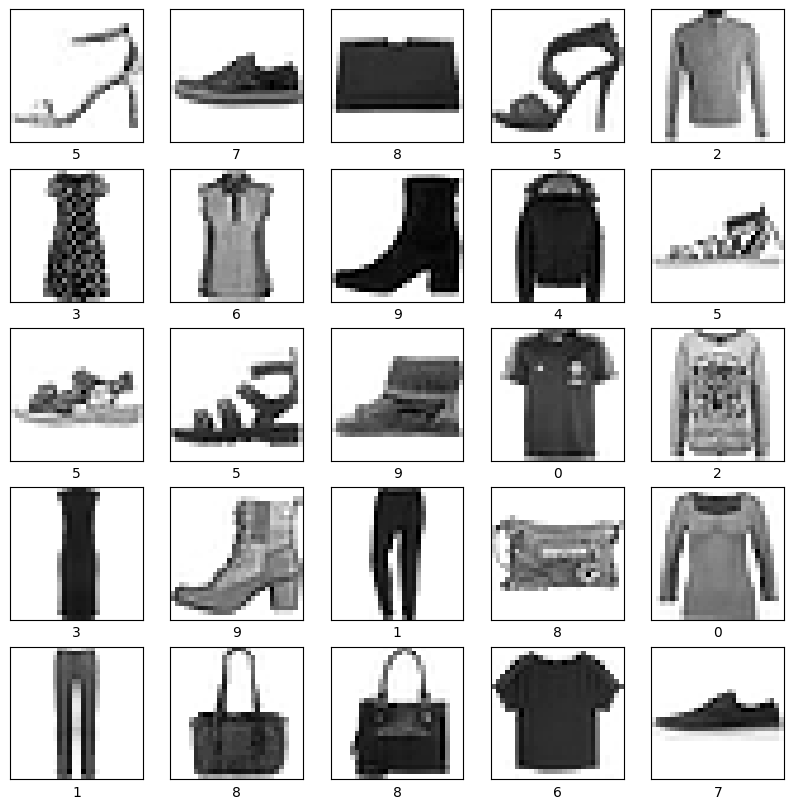

In [9]:
# Visualizar algunas imágenes
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(np.argmax(y_train[i]))
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step


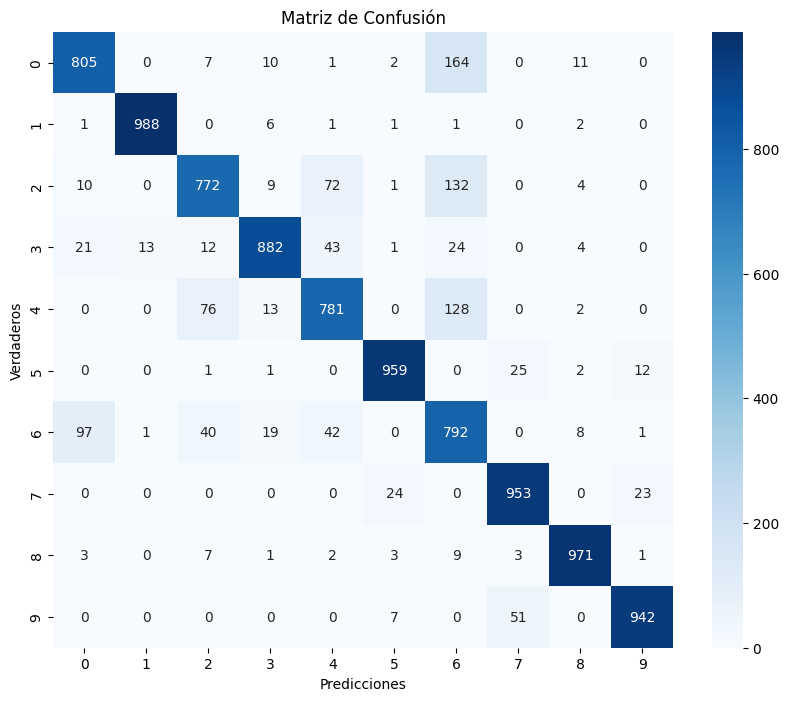

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predecir los valores del conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1) 
y_true = np.argmax(y_test, axis=1) 

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')
plt.show()
